## Data Wrangling

In [1]:
#import needed packages

import pandas as pd
import numpy as np

#### Loading data 

In [2]:
#loading data from an excel file
data = pd.read_excel('../raw_data/potential-talents.xlsx')

In [3]:
pd.set_option('display.max_colwidth',None)
data.head()

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0,NaN
1,2.0,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


#### drop id ( an id assigned ) and fit columns as they are not needed

In [4]:
cols_to_drop = ['id', 'fit']
data.drop(cols_to_drop, axis=1, inplace=True)

#### check data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_title   104 non-null    object
 1   location    104 non-null    object
 2   connection  104 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [6]:
data.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

* This dataset has 3 variables - job_title, location and connection
* There are no missing data in this data set
* This dataset has 104 observations

#### Check for duplicates and remove the duplicate data

In [7]:
data_duplicate = data[data.duplicated()]
data_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 8 to 64
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_title   51 non-null     object
 1   location    51 non-null     object
 2   connection  51 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [8]:
data_duplicate.head()

,job_title,location,connection
8,Student at Humber College and Aspiring Human Resources Generalist,Kanada,61.0
13,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0
14,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0
15,Native English Teacher at EPIK (English Program in Korea),Kanada,500+
16,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0


In [9]:
data.drop_duplicates(subset=['job_title'], inplace=True)
data.shape

(52, 3)

#### After dropping duplicate data, the dataset has only 52 observations

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
# print the job_title to analyze the text
data['job_title'].value_counts()

2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 1
Native English Teacher at EPIK (English Program in Korea)                                                                1
Junior MES Engineer| Information Systems                                                                                 1
Senior Human Resources Business Partner at Heil Environmental                                                            1
Aspiring Human Resources Professional | An energetic and Team-Focused Leader                                             1
HR Manager at Endemol Shine North America                                                                                1
Human Resources professional for the world leader in GIS software                                                        1
RRP Brand Portfolio Executive at JTI (Japan Tobacco International)                                                       1
Information Syst

Common puncutations like '.', ',', '&' will have to be removed.
The '|' separator in the text is followed by spaces in some text and in other text there is no space. So will have to handle these separately when cleaning the text

In [12]:
# print the count and values of location
data['location'].value_counts()

Houston, Texas Area                    4
Raleigh-Durham, North Carolina Area    3
Greater New York City Area             3
Amerika Birleşik Devletleri            2
Kanada                                 2
Greater Philadelphia Area              2
Austin, Texas Area                     2
Greater Atlanta Area                   2
Houston, Texas                         1
Greater Chicago Area                   1
Highland, California                   1
Gaithersburg, Maryland                 1
Baltimore, Maryland                    1
Milpitas, California                   1
Long Beach, California                 1
Torrance, California                   1
Chattanooga, Tennessee Area            1
Bridgewater, Massachusetts             1
Lafayette, Indiana                     1
Las Vegas, Nevada Area                 1
Cape Girardeau, Missouri               1
Greater Los Angeles Area               1
Los Angeles, California                1
Dallas/Fort Worth Area                 1
Myrtle Beach, So

Most of the candidates are located in Houston, Texas Area. Amerika Birleşik Devletleri and İzmir, Türkiye values can be removed as we are looking at US and Canada areas. Canada is mispelted as Kanada, which needs to be corrected. We can also remove the word 'greater' and 'area' from the locations.

In [13]:
# print the values for connection
data['connection'].value_counts()

500+     18
4.0       2
57.0      2
7.0       2
39.0      1
40.0      1
18.0      1
349.0     1
155.0     1
85.0      1
50.0      1
9.0       1
415.0     1
19.0      1
48.0      1
103.0     1
64.0      1
174.0     1
268.0     1
455.0     1
52.0      1
409.0     1
212.0     1
16.0      1
5.0       1
82.0      1
390.0     1
2.0       1
61.0      1
1.0       1
44.0      1
49.0      1
Name: connection, dtype: int64

connection contains both numbers and characters. + sign should be removed from the values

### Further cleaning of data

#### location
* Here Kanada is changed to Canada
* Remove 'greater' and 'area' text in the location values
* Add missing states
* Remove İzmir, Türkiye and Amerika Birleşik Devletleri as we are only considering US and Canada 

In [14]:
index_names = data[(data['location'] == 'İzmir, Türkiye') | (data['location'] == 'Amerika Birleşik Devletleri')].index
data.drop(index_names, inplace = True)

data.reset_index(drop=True, inplace=True)

In [15]:
data['location'] = data['location'].apply(lambda x: x.lower())
data['location'] = data['location'].apply(lambda x: x.strip())

In [16]:
data.replace(to_replace = 'kanada', value = 'canada', inplace=True)
data['location'] = data['location'].replace(to_replace = [' area', 'greater '], value = '', regex = True)

In [17]:
# Replacing missing State values

data['location'] = data['location'].replace(to_replace = 'new york city',value = 'new york, new york')
data['location'] = data['location'].replace(to_replace = 'chicago',value = 'chicago, illinois')
data['location'] = data['location'].replace(to_replace = 'atlanta',value = 'atlanta, georgia')

data['location'] = data['location'].replace(to_replace = 'los angeles',value = 'los angeles, california')
data['location'] = data['location'].replace(to_replace = 'philadelphia',value = 'philadelphia, pennsylvania')
data['location'] = data['location'].replace(to_replace = 'boston',value = 'boston, massachusetts')
data['location'] = data['location'].replace(to_replace = 'san francisco bay',value = 'san francisco, california')
data['location'] = data['location'].replace(to_replace = 'canada',value = 'canada, canada')

data['location'] = data['location'].replace(to_replace = 'dallas/fort worth',value = 'dallas fort worth, texas')
data['location'] = data['location'].replace(to_replace = 'raleigh-durham, north carolina',value = 'raleigh durham, north carolina')

#### connection 
* removing the + sign from 500 value

In [18]:
data['connection'] = data['connection'].replace(to_replace='500', value=500, regex=True)

In [19]:
data.shape

(49, 3)

#### The final dataset contains 49 observations 

In [20]:
# save the data to a new csv file
data.to_csv('../data/data_cleaned_1.csv', index=False)

## Text preprocessing

#### Perform the following steps

* Remove punctuations and other special characters
* Tokenization - Split the text into sentences and then into words. Remove punctuation and lowercase the words
* Remove all stop words

In [21]:
# load cleaned data 
data_df = pd.read_csv('../data/data_cleaned_1.csv')

In [22]:
data_df.head()

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"houston, texas",85.0
1,Native English Teacher at EPIK (English Program in Korea),"canada, canada",500.0
2,Aspiring Human Resources Professional,"raleigh durham, north carolina",44.0
3,People Development Coordinator at Ryan,"denton, texas",500.0
4,Aspiring Human Resources Specialist,"new york, new york",1.0


### Remove punctuation and digits, stopwords and Tokenize

In [23]:
import re
import string
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#create custum punctuation list to handle '|' in the text
custom_punctuation = string.punctuation.replace('|', '')

# remove punctuation, stop words and tokenize
def clean_text(text):
    text = re.sub('\d{3,}-|\((\d+)\)|\d+?$','', text) #remove phone number
    text = re.sub('\|', ' ', text)  # remove | and insert space
    text = "".join([word for word in text if word not in custom_punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data_df['job_title_nostop'] = data_df['job_title'].apply(lambda x: clean_text(x.lower()))

In [25]:
data_df.head()

,job_title,location,connection,job_title_nostop
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"houston, texas",85.0,"[2019, ct, bauer, college, business, graduate, magna, cum, laude, aspiring, human, resources, professional]"
1,Native English Teacher at EPIK (English Program in Korea),"canada, canada",500.0,"[native, english, teacher, epik, english, program, korea]"
2,Aspiring Human Resources Professional,"raleigh durham, north carolina",44.0,"[aspiring, human, resources, professional]"
3,People Development Coordinator at Ryan,"denton, texas",500.0,"[people, development, coordinator, ryan]"
4,Aspiring Human Resources Specialist,"new york, new york",1.0,"[aspiring, human, resources, specialist]"


In [26]:
#displays each title as a string
data_df['job_title_nostop'] = data_df['job_title_nostop'].apply(' '.join)

#### Text processing for location
* remove ',', '-' and '/'

In [27]:
def clean_location_text(text):
    tokens = re.split('\W+', text)
    return tokens

data_df['location_cleaned'] = data_df['location'].apply(lambda x: clean_location_text(x))

In [28]:
data_df['location_cleaned'] = data_df['location_cleaned'].apply(' '.join)

In [29]:
data_df.head()

,job_title,location,connection,job_title_nostop,location_cleaned
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"houston, texas",85.0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional,houston texas
1,Native English Teacher at EPIK (English Program in Korea),"canada, canada",500.0,native english teacher epik english program korea,canada canada
2,Aspiring Human Resources Professional,"raleigh durham, north carolina",44.0,aspiring human resources professional,raleigh durham north carolina
3,People Development Coordinator at Ryan,"denton, texas",500.0,people development coordinator ryan,denton texas
4,Aspiring Human Resources Specialist,"new york, new york",1.0,aspiring human resources specialist,new york new york


#### combine both the cleaned job_title and location into one column

In [30]:
data_df['combined'] = data_df['job_title_nostop'] + " " + data_df['location_cleaned']

In [31]:
data_df.head()

,job_title,location,connection,job_title_nostop,location_cleaned,combined
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"houston, texas",85.0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional,houston texas,2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas
1,Native English Teacher at EPIK (English Program in Korea),"canada, canada",500.0,native english teacher epik english program korea,canada canada,native english teacher epik english program korea canada canada
2,Aspiring Human Resources Professional,"raleigh durham, north carolina",44.0,aspiring human resources professional,raleigh durham north carolina,aspiring human resources professional raleigh durham north carolina
3,People Development Coordinator at Ryan,"denton, texas",500.0,people development coordinator ryan,denton texas,people development coordinator ryan denton texas
4,Aspiring Human Resources Specialist,"new york, new york",1.0,aspiring human resources specialist,new york new york,aspiring human resources specialist new york new york


In [32]:
# save the data to a new csv file
data_df.to_csv('../data/data_cleaned_2.csv', index=False)

In [33]:
# load cleaned data 
data_df = pd.read_csv('../data/data_cleaned_2.csv')

### Exploratory Data Analysis

In [34]:
#import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

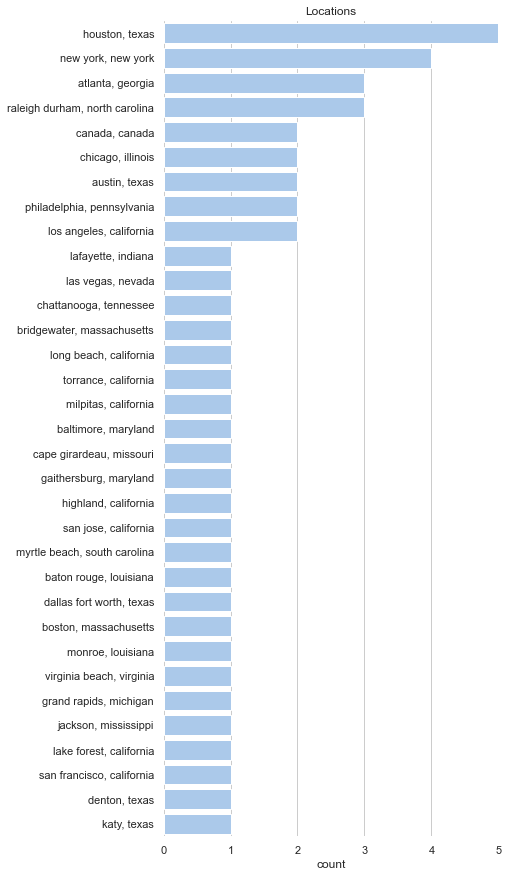

In [35]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")

sns.countplot(y='location', color='b', data=data_df, order = data_df['location'].value_counts().index)

ax.set(xlim=(0, 5), ylabel="", title="Locations")
sns.despine(left=True, bottom=True)

Majority of the locations are only reference once. Houston, Texas is referenced the most which is 4 times.

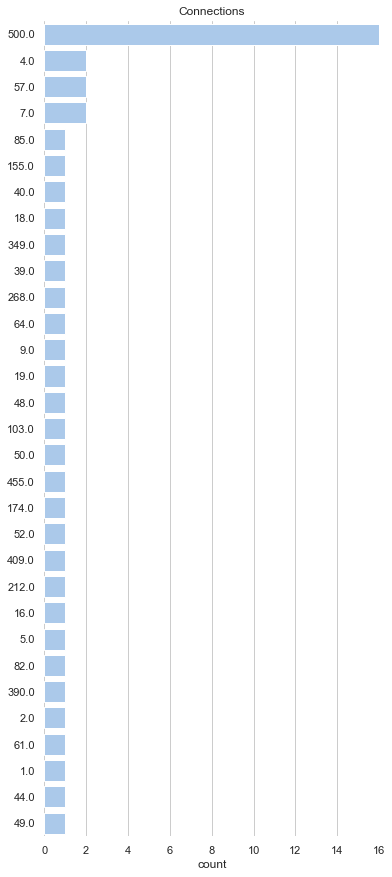

In [36]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")

sns.countplot(y='connection', color='b', data=data_df, order = data_df['connection'].value_counts().index)
ax.set(xlim=(0, 16), ylabel="", title="Connections")
sns.despine(left=True, bottom=True)

About 16 people have 500 connections.

### Analyzing text statistics

#### Word Cloud - a technique to show which words are the most frequent among the given text.
#### Plotting for both job_title text and combined text with both job_title and location

In [37]:
# Plotting for job_title text
#text = data_df['job_title_nostop'].apply(' '.join)
text = data_df['job_title_nostop']
text_to_analyze = ' '.join(text.tolist())

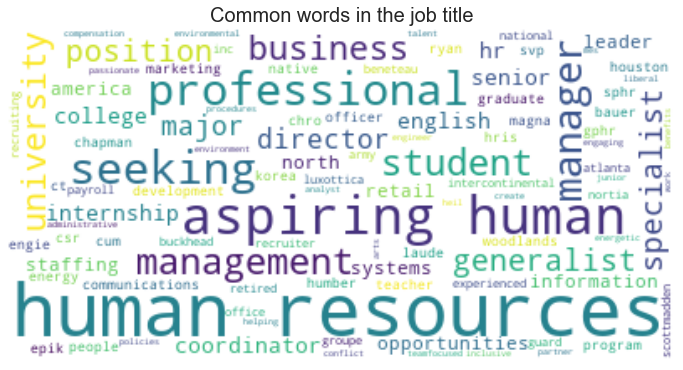

In [38]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_to_analyze)
plt.figure(figsize=[12,12])
plt.title('Common words in the job title', fontsize=20)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

This word cloud shows the most common words in the job title text.

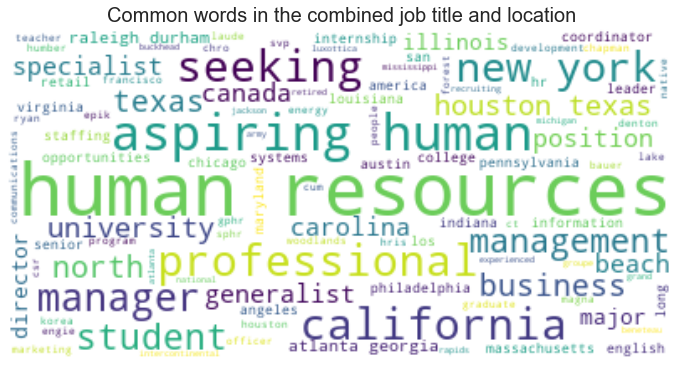

In [39]:
# Plotting for combined job_title and location text
text1 = data_df['combined']
text_to_analyze1 = ' '.join(text1.tolist())


# Create and generate a word cloud image:
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_to_analyze1)
plt.figure(figsize=[12,12])
plt.title('Common words in the combined job title and location', fontsize=20)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off");

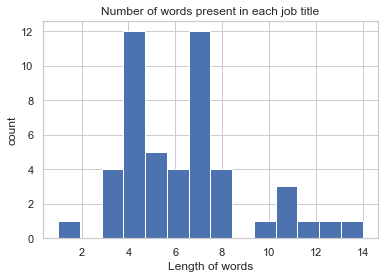

In [40]:
#Shows the number of words present in each job_title
#data_df['job_title_nostop'].str.len().hist()
data_df['job_title_nostop'].str.split().apply(len).hist(bins=14)
plt.title('Number of words present in each job title')
plt.xlabel('Length of words')
plt.ylabel('count');

The histogram shows that job title range from 1 to 14 words and generally, it is between 4 to 7 words.

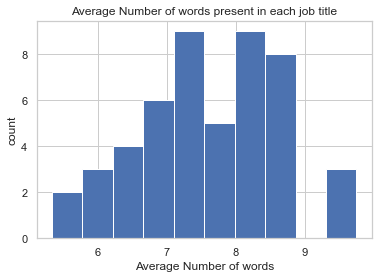

In [41]:
# plot the average number of words appearing in each job title.
def plot_word_length_histogram(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    
#plot_word_length_histogram(data_df['job_title_nostop'].apply(' '.join))
plot_word_length_histogram(data_df['job_title_nostop'])
plt.title('Average Number of words present in each job title')
plt.xlabel('Average Number of words')
plt.ylabel('count');

The average word length ranges between 5 to 11 with 7 & 8 being the most common length.

### Term frequencies
Find the most frequent words in the data, extracting information about its content and topics.

#### Create a Document Term Matrix for the text in job_title

In [42]:
cv = CountVectorizer(analyzer='word')
data_cv = cv.fit_transform(data_df['job_title_nostop'])
one_gram_df = pd.DataFrame(data_cv.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(50)

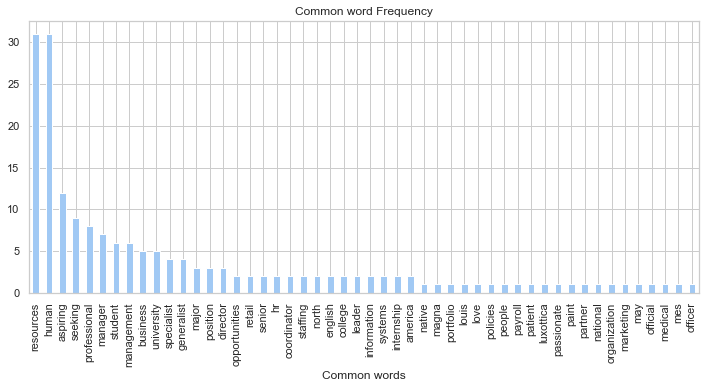

In [43]:
one_gram_df.plot(kind='bar', figsize=(12,5), color='b', title='Common word Frequency', legend=False, xlabel="Common words");

The most commmon words after ploting from the document term matrix are 'resources' and 'human'. Only the top 50 words are plotted here.

#### Checking for frequent bi-gram in job title text

In [44]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(data_df['job_title_nostop'])
bi_gram_df = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

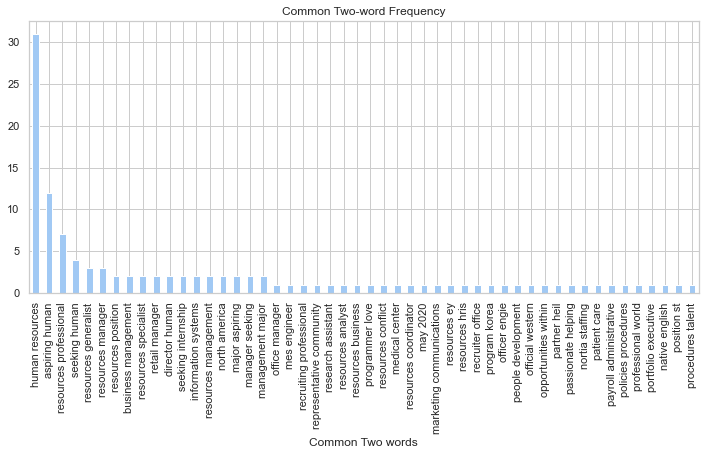

In [45]:
bi_gram_df.plot(kind='bar', figsize=(12,5), color='b', title='Common Two-word Frequency', legend=False, xlabel="Common Two words");

The most common two words are 'human resources' and 'aspiring human' from the document term matrix. Only the top 50 words are plotted.

#### Create a Document Term Matrix for the combined text in job_title and location

In [46]:
cv1 = CountVectorizer(analyzer='word')
data_cv1 = cv1.fit_transform(data_df['combined'])
one_gram_df1 = pd.DataFrame(data_cv1.sum(axis=0),columns=cv1.get_feature_names()).T.sort_values(0,ascending=False).head(50)

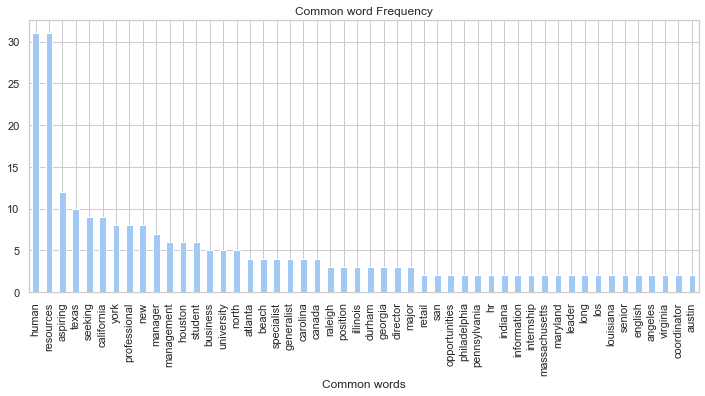

In [47]:
one_gram_df1.plot(kind='bar', figsize=(12,5), color='b', title='Common word Frequency', legend=False, xlabel="Common words");

The most commmon words after ploting from the document term matrix are 'resources' and 'human'. Only the top 50 words are plotted here.

#### Checking for frequent bi-gram for both combined  text in job_title and location

In [48]:
co1 = CountVectorizer(ngram_range=(2,2))
counts1 = co1.fit_transform(data_df['combined'])
bi_gram_df1 = pd.DataFrame(counts1.sum(axis=0),columns=co1.get_feature_names()).T.sort_values(0,ascending=False).head(50)

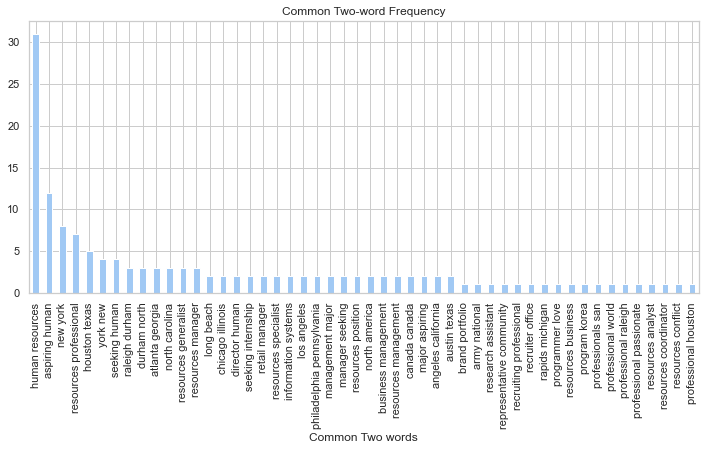

In [49]:
bi_gram_df1.plot(kind='bar', figsize=(12,5), color='b', title='Common Two-word Frequency', legend=False, xlabel="Common Two words");

The most common two words are 'human resources' and 'aspiring human' from the document term matrix. Only the top 50 words are plotted.

In [50]:
# save the data to a new csv file
data_df.to_csv('../data/data_cleaned_3.csv', index=False)